In [273]:
import numpy as np
import operator
import matplotlib.pyplot as plt
import os

In [292]:
def CreateDataSet():
    dataSet = np.array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return dataSet, labels
def KNN(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat ** 2
    sqDistances = sqDiffMat.sum(axis = 1)
    distances = sqDistances ** 0.5
    sortedDistIndices = distances.argsort() # sort the give original index
    vote = {}
    for i in range(k):
        if labels[sortedDistIndices[i]] not in vote.keys():
            vote[labels[sortedDistIndices[i]]] = 1
        else:
            vote[labels[sortedDistIndices[i]]] += 1
    return sorted(vote.items(), key = operator.itemgetter(1), reverse = True)[0][0]
def LoadText(FileName):
    file = open(FileName)
    dataMat = []
    dataLab = []
    for line in file.readlines():
        data = line.strip().split('\t')
        dataMat.append(data[:-1])
        dataLab.append(data[-1])
    return np.array(dataMat).astype(float), np.array(dataLab)
def NormData(dataMat):
    minValues = dataMat.min(0)
    maxValues = dataMat.max(0)
    intervals = maxValues - minValues
    NormDataSet = (dataMat - np.tile(minValues, (dataMat.shape[0], 1))) / np.tile(intervals, (dataMat.shape[0], 1))
    return NormDataSet, maxValues, minValues
def SeperateData(dataMat, dataLab, num):
    testData = []
    testDataLabel = []
    trainData = []
    trainDataLabel = []
    for i in range(dataMat.shape[0]):
        if i >= num*100 and i <(num+1)*100:
            testData.append(dataMat[i])
            testDataLabel.append(dataLab[i])
        else:
            trainData.append(dataMat[i])
            trainDataLabel.append(dataLab[i])
    return np.array(testData), np.array(testDataLabel), np.array(trainData), np.array(trainDataLabel)
def KKNCrossTest():
    dataMat, dataLab = LoadText('datingTestSet.txt')
    numCross = 10
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for label in set(list(dataLab)):
        ax.scatter(dataMat[np.nonzero(dataLab == label)][:, 0], dataMat[np.nonzero(dataLab == label)][:, 1])
    plt.show()
    NormDataMat, maxValues, minValues = NormData(dataMat)
    MeanError = []
    for num in range(numCross):
        error = 0
        testData = NormDataMat[num * 100 : (num + 1)*100, :]
        testDataLabel = dataLab[num * 100 : (num + 1)*100]
        trainData = np.insert(NormDataMat[:num*100, :], obj = NormDataMat[:num*100, :].shape[0], \
                              values = NormDataMat[(num+1) * 100:, :], axis = 0)
        trainDataLabel = np.insert(dataLab[:num*100], obj = dataLab[:num*100].shape[0], \
                              values = dataLab[(num+1) * 100:], axis = 0)
        for i in range(len(testData)):
            if KNN(testData[i], trainData, trainDataLabel, 3) != testDataLabel[i]:
                error += 1
        print('Error rate is {}'.format(error/len(testData)))
        MeanError.append(error/len(testData))
    print('Mean error rate is {}'.format(np.mean(MeanError)))
def ImageToMatrix(FileName):
    vect = []
    file = open(FileName)
    for line in file.readlines():
        for j in range(len(line[:-1])):
            vect.append(line[j])
    return np.array(vect).astype(int)
def HandwritingClassTest():
    TrainLabel = []
    TrainData = []
    TestLabel = []
    TestData = []
    for file in os.listdir('trainingDigits'):
        TrainData.append(ImageToMatrix('trainingDigits/{}'.format(file)))
        TrainLabel.append(int(file.split('_')[0]))
    TrainData = np.array(TrainData)
    TrainLabel = np.array(TrainLabel)
    error = 0
    for file in os.listdir('testDigits'):
        TestData.append(ImageToMatrix('testDigits/{}'.format(file)))
        TestLabel.append(int(file.split('_')[0]))
        clf = KNN(ImageToMatrix('testDigits/{}'.format(file)), TrainData, TrainLabel, 3)
        if clf != int(file.split('_')[0]):
            error += 1
    print('Error rate is {}'.format(error/len(os.listdir('testDigits'))))

In [295]:
HandwritingClassTest()

Error rate is 0.010570824524312896


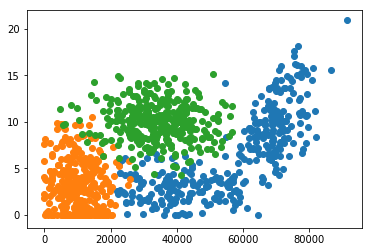

Error rate is 0.05
Error rate is 0.1
Error rate is 0.08
Error rate is 0.06
Error rate is 0.06
Error rate is 0.05
Error rate is 0.06
Error rate is 0.01
Error rate is 0.02
Error rate is 0.06
Mean error rate is 0.05500000000000001


In [294]:
KKNCrossTest()

In [6]:
list(combinations(range(1, 4), 2))

[(1, 2), (1, 3), (2, 3)]